# OBJECTIVE: TO FIND IF A CUSTOMER PURCHASED AN ITEM AFTER WATCHING A SOCIAL NETWORK AD - USING DECISION TREE

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches. It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.

**1. Importing the libraries**

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**2. Importing the dataset**

In [2]:
df = pd.read_csv('/Users/prashastisaraf/Downloads/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**3. Exploring the data**

In [3]:
df.shape

(400, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**3. Separate the target variable from the attributes in the dataset**

The feature 'Gender' in this dataset is categorical. Sklearn Decision Trees do not handle categorical variables. So we convert it to numerical values.

In [5]:
# Import label encoder 
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Country'. 
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


The variable X contains the attributes while the variable Y contains the target variable of the dataset.

In [7]:
# x is target variable
x = df[['Gender','Age', 'EstimatedSalary']].values
x[0:5]

array([[    1,    19, 19000],
       [    1,    35, 20000],
       [    0,    26, 43000],
       [    0,    27, 57000],
       [    1,    19, 76000]])

In [8]:
# y is target variable
y = df['Purchased'].values
y[0:5]

array([0, 0, 0, 0, 0])

**4. Split the data set into training data and test data**

In [9]:
 # Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                        test_size = 0.3)

Above line split the dataset for training and testing. As we are splitting the dataset in a ratio of 70:30 between training and testing so we are pass test_size parameter’s value as 0.3.

**5. Train the decision tree model**

In [10]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

# Train Decision Tree Classifer
model.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

#View predicted result
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

**6. Measure the performance of the decision tree model**

In [11]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


Accuracy of the model is 93.33%

In [12]:
#Import scikit-learn metrics module for confusion matrix calculation
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[79  4]
 [ 4 33]]


In [14]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [15]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

**7. Visualise the decision tree**

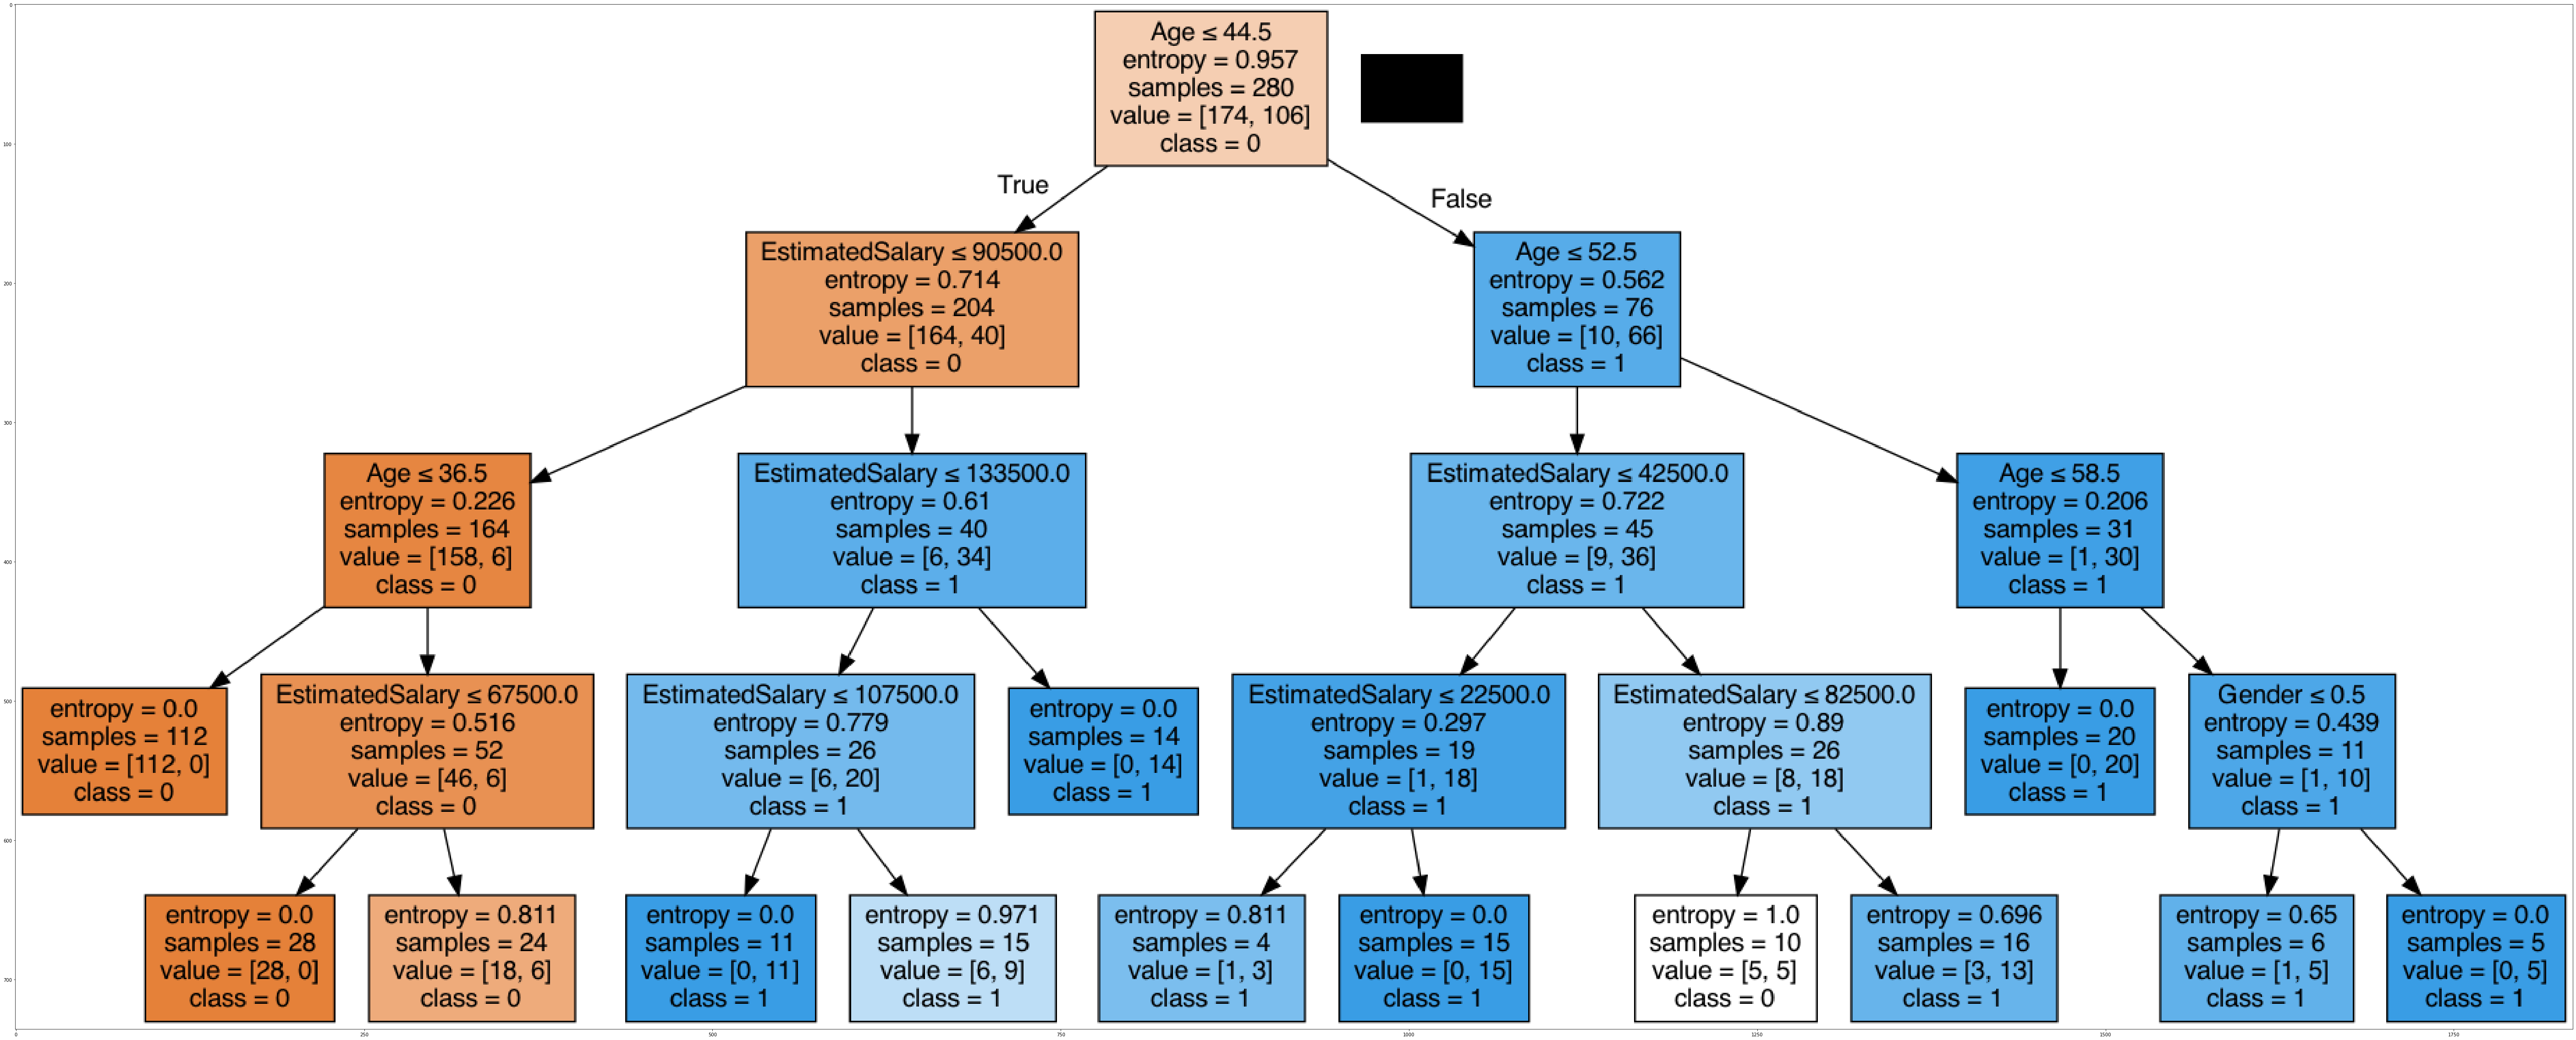

In [18]:
from sklearn.tree import plot_tree # tree diagram

x=np.unique(y_train)
x=x.astype('str')

dot_data = StringIO()
filename = "drugtree.png"
feature_names = df.columns[1:4]
out=tree.export_graphviz(model,feature_names=feature_names, 
                out_file=dot_data, class_names= x, filled=True,  
                special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')